In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter

from sklearn.datasets import load_iris

In [15]:
## import the dataset
iris = load_iris()

In [16]:
type(iris)

sklearn.utils.Bunch

In [17]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [18]:
type(iris.data)

numpy.ndarray

In [19]:
iris.data.shape

(150, 4)

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

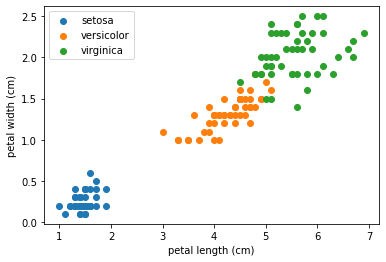

In [23]:
# visualize the data

plt.scatter(iris['data'][iris.target==0,2],iris['data'][iris.target==0,3], label='setosa')
plt.scatter(iris['data'][iris.target==1,2],iris['data'][iris.target==1,3], label='versicolor')
plt.scatter(iris['data'][iris.target==2,2],iris['data'][iris.target==2,3], label='virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

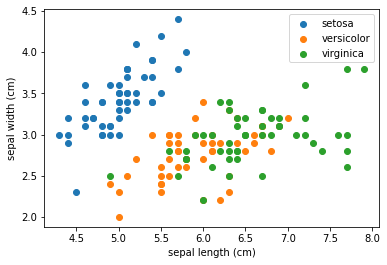

In [24]:
plt.scatter(iris['data'][iris.target==0,0],iris['data'][iris.target==0,1], label='setosa')
plt.scatter(iris['data'][iris.target==1,0],iris['data'][iris.target==1,1], label='versicolor')
plt.scatter(iris['data'][iris.target==2,0],iris['data'][iris.target==2,1], label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

In [25]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [27]:
# Instantiate learning model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
# Fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# Predict the response
pred = knn.predict(X_test)

In [30]:
# Evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 0.98


In [33]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred, labels=[0,1,2])
cnf_matrix

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

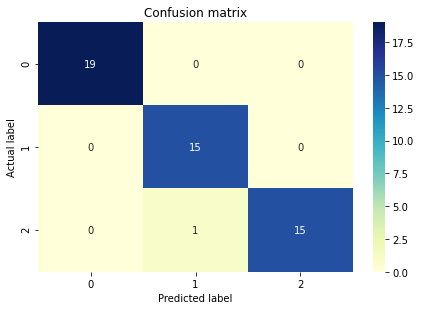

In [34]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
# Creating odd list of k for KNN
neighbors = list(range(1,50,2))

In [39]:
# empty list that will hold cv scores
cv_scores=[]

In [40]:
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [41]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 3.


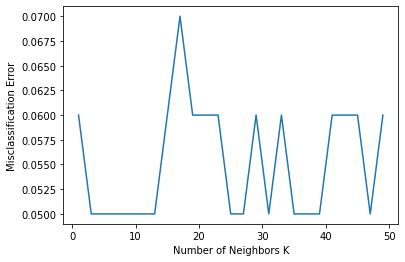

In [42]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()